# Coursework Code

## B. Consider Bayesian analysis of the illustrative polynomial interpolation problem in PRML §1.1. using Evidence Approximation method discussed in PRML §3.5.1.

### 1. Generate a dataset similar to this illustration and solve the regression problem with various orders of polynomials. You should have a training dataset and a separate testing dataset. What is the variation in the test set prediction error taken over different realizations of the data? Quantify this by means of boxplots at different model orders.

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split

In [136]:
def noise(n,m):
    return np.random.normal(n,m,1)

In [137]:
n = 100

rn = np.random.uniform(-2, 2, n)
x_clean = np.reshape(np.sort(rn, axis=0), (n, 1))

def f(x):
    return math.sin(math.pi*x)

In [138]:
x = x_clean
f2 = np.vectorize(f)
y_clean = f2(x)
y = y_clean + noise(0,0.1)

Shape X Train:(85, 1) Test:(15, 1)
Shape y Train:(85, 1) Test:(15, 1)
Shape X Train:(85, 1) Test:(15, 1)
Shape y Train:(85, 1) Test:(15, 1)


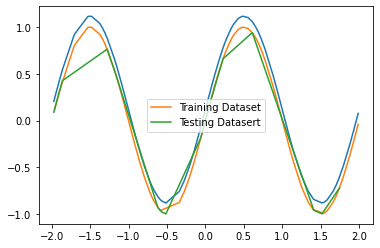

In [139]:
x_train_2, x_test_2, y_train, y_test = train_test_split(x,y,test_size=0.15)

print('Shape X Train:'+str(x_train_2.shape)+" Test:"+str(x_test_2.shape))
print('Shape y Train:'+str(y_train.shape)+" Test:"+str(y_test.shape))
x_train = np.reshape(np.sort(x_train_2, axis=0), (len(x_train_2), 1))
x_test = np.reshape(np.sort(x_test_2, axis=0), (len(x_test_2), 1))

y_train = f2(x_train)
y_test = f2(x_test)

print('Shape X Train:'+str(x_train.shape)+" Test:"+str(x_test.shape))
print('Shape y Train:'+str(y_train.shape)+" Test:"+str(y_test.shape))


plt.plot(x,y)
plt.plot(x_train, y_train, label="Training Dataset")
plt.plot(x_test, y_test, label="Testing Datasert")
plt.legend()
plt.savefig("fig/traintestsplit.png")

In [140]:
def polynomial_basis_fn(x, degree):
    return x ** degree
def make_design(x, basisfn, basisfn_locs=None): 
    if basisfn_locs is None:
        return np.concatenate([np.ones(x.shape), basisfn(x)], axis=1)
    else:
        return np.concatenate([np.ones(x.shape)] + [basisfn(x, loc) for loc in basisfn_locs], axis=1)

In [141]:
# My functions

def calculate_w_poly(x, y, lam, p):
    locs = []
    for i in range(1,p+1):
        locs.append(i)
    
    design = make_design(x, polynomial_basis_fn, locs)

    w = (np.linalg.inv(design.T @ design + lam * np.identity(p+1)) @ (design.T @ y))
    return w

def polynomial_regression(x_test, x_train, y_test, lam, p):
    w = calculate_w_poly(x_test,y_test,lam,p)

    t = []
    for xVal in x_train:
        targ = 0
        targ = targ + w[0]
        for i in range(1,len(w)):
            targ = targ + w[i]*polynomial_basis_fn(xVal,i)
        t.append(targ)
    return t

def error(y,t):
    error = 0
    for i in range(0,len(t)):
        error = error + (t[i]-y[i])**2
    return error

def erms(y,t,N):
    return math.sqrt((2*error(y,t))/N)

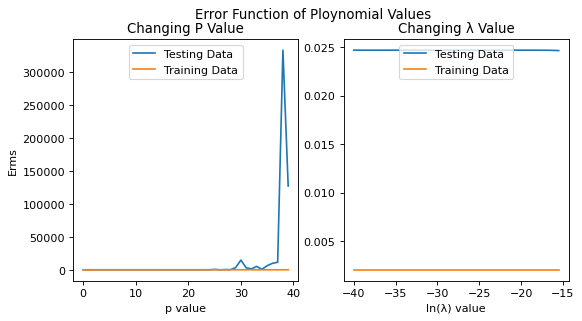

In [142]:
pvalues = []

pmax = 40
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Error Function of Ploynomial Values')

fig.set_dpi(80)
fig.set_size_inches(8,4)
for i in range(0,pmax):
    pvalues.append(i)
# fig, axes = plt.subplots(2,1) #https://stackoverflow.com/questions/3207850/creating-square-subplots-of-equal-height-and-width-in-matplotlib
# fig.set_dpi(80)
# fig.set_size_inches(8,8)
i = 0
j = 0
errorfunction_train = []
errorfunction_test = []
for j in range(0,len(pvalues)):
    t_train = polynomial_regression(x_test, x_train, y_test,0,pvalues[i])
    errorfunction_train.append(erms(y_train,t_train,len(t_train)))
    t_test = polynomial_regression(x_test, x_test, y_test,0,pvalues[i])
    errorfunction_test.append(erms(y_test,t_test,len(t_test)))
    
    i = i + 1
ax1.set_title("Changing P Value")
ax1.set_xlabel("p value")
ax1.set_ylabel("Erms")
ax1.plot(pvalues, errorfunction_train, label="Testing Data")
ax1.plot(pvalues, errorfunction_test, label="Training Data")
ax1.legend(loc = "upper center")

lamvalues = []

for i in range(-80,-30):
    lamvalues.append(i/2)
errorfunction_train = []
errorfunction_test = []
i = 0
for j in range(0,len(lamvalues)):
    t_train = polynomial_regression(x_test, x_train, y_test,math.exp(lamvalues[i]),9)
    errorfunction_train.append(erms(y_train,t_train,len(t_train)))
    t_test = polynomial_regression(x_test, x_test, y_test,math.exp(lamvalues[i]),9)
    errorfunction_test.append(erms(y_test,t_test,len(t_test)))
    
    i = i + 1
ax2.set_title("Changing λ Value")
ax2.set_xlabel("ln(λ) value")
#ax2.set_ylabel("Erms")
ax2.plot(lamvalues, errorfunction_train, label="Testing Data")
ax2.plot(lamvalues, errorfunction_test, label="Training Data")
ax2.legend(loc = "upper center")

plt.savefig('fig/errorpvalues.png')

In [143]:
def get_minvalue(inputlist):
 
    #get the minimum value in the list
    min_value = min(inputlist)
 
    #return the index of minimum value 
    min_index=inputlist.index(min_value)
    return min_index

print("Minimum Lambda: "+str(lamvalues[get_minvalue(errorfunction_train)]))

Minimum Lambda: -15.5


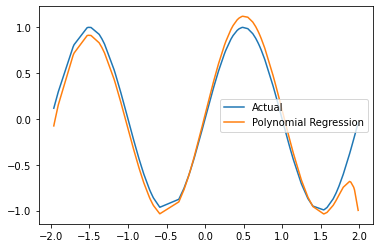

In [144]:
t = polynomial_regression(x_test, x_train, y_test,0, 15)


plt.plot(x_train, y_train, label="Actual")
plt.plot(x_train, t, label="Polynomial Regression")
plt.legend()

In [145]:
t_array = []

num_plots = 15

for i in range(0,num_plots):
    t_array.append(polynomial_regression(x_test, x_train, y_test,0,i))

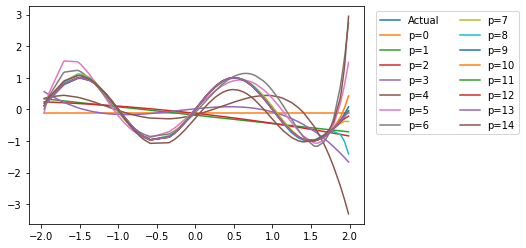

In [146]:
plt.plot(x_train, y_train, label="Actual")
for i in range(0,num_plots):
    plt.plot(x_train, t_array[i], label="p="+str(i))
plt.legend(loc='upper center', bbox_to_anchor=(1.25, 1), ncol=2)
plt.savefig("fig/pvalueplots.png")

In [147]:
def error(y,t):
    error = 0
    for i in range(0,len(t)):
        error = error + (t[i]-y[i])**2
    return error

def erms(y,t,N):
    return math.sqrt((2*error(y,t))/N)

In [148]:
error_value = []
error_labels = []
for i in range(0,num_plots):
    error_value.append(y_train-t_array[i])
    error_labels.append(0)

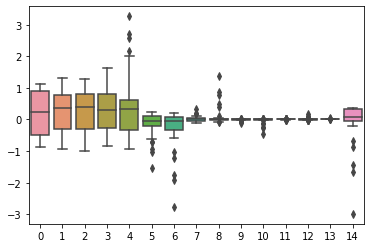

In [149]:
import seaborn as sns

plot = sns.boxplot(data=error_value)

fig = plot.get_figure()

fig.savefig("fig/pvalueboxplot.png")


### 2. Implement a regularized regression for a high order polynomial (say 9) at various values of the regularization hyperparameter λ.

See errorpvalues plot for this information.

In [150]:
t = polynomial_regression(x_test, x_train, y_test,math.exp(-18), 9)

### 3. Compute the Bayesian evidence formula of §3.5.1 for this problem at various values of α and β taken over a regular grid on two dimensions. Illustrate the results by means of contour plot.

In [151]:
def bayesian_evidence_function(t, a, b, design, order):
    N = t.shape[0]


    A = a * np.identity(order+1) + b * np.dot(design.T, design)

    m = b * np.dot(np.linalg.pinv(A),np.dot(design.T, t))

    loss = (b/2) * np.dot(np.squeeze(t-np.dot(design, m)),np.squeeze(t-np.dot(design, m))) + (a/2) * np.dot(m.T, m)


    log_evidence_func = (order/2)*math.log(a) + (N/2)*math.log(b) - loss - 0.5*math.log(np.linalg.det(A)) - (N/2)*math.log(2*math.pi)

    return log_evidence_func

In [152]:
a_values = np.arange(0.1,10, 0.1)
b_values = np.arange(1,5000, 1)

order = 9
locs = []
for i in range(1,order+1):
    locs.append(i)

contour = np.array([[bayesian_evidence_function(y_test, a_val, b_val, make_design(x_test, polynomial_basis_fn, locs), order) for a_val in a_values] for b_val in b_values])

In [153]:
print(contour.shape)
indices = np.where(np.squeeze(contour) == np.squeeze(contour).max())
print(np.squeeze(contour)[indices])
print(indices)

(4999, 99, 1, 1)
[-15.52123394]
(array([4998], dtype=int64), array([1], dtype=int64))


In [154]:
print(a_values[indices[1]])
print(b_values[indices[0]])

print(bayesian_evidence_function(y_test, a_values[indices[1]], b_values[indices[0]], make_design(x_test, polynomial_basis_fn, locs), order))

[0.2]
[4999]
[[-15.52123394]]


In [155]:
a_values = np.arange(0.480, 0.520, 0.0001)
b_values = np.arange(39, 49, 0.1)

order = 9
locs = []
for i in range(1,order+1):
    locs.append(i)

contour = np.array([[bayesian_evidence_function(y_test, a_val, b_val, make_design(x_test, polynomial_basis_fn, locs), order) for a_val in a_values] for b_val in b_values])

In [156]:
print(contour.shape)
indices = np.where(np.squeeze(contour) == np.squeeze(contour).max())
print(np.squeeze(contour)[indices])
print(indices)

print(a_values[indices[1]])
print(b_values[indices[0]])

(100, 401, 1, 1)
[-23.96355426]
(array([99], dtype=int64), array([400], dtype=int64))
[0.52]
[48.9]


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 401 and the array at index 1 has size 100

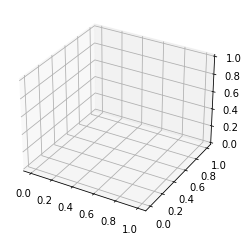

In [159]:
#plt.contourf(a_values, b_values, np.squeeze(contour))

fig = plt.figure()

fig_axes = plt.axes(projection='3d')

fig_axes.plot_surface(a_values, b_values, np.squeeze(contour))

### 4. By inspecting the above find the values of α and β for which the evidence p(t|α, β) is maximum.

### 5. How close are these values to the solutions derived in Eqn. 3.92 and 3.95? How close is their ratio to the best λ obtained in (ii) above?